<a href="https://colab.research.google.com/github/mohcenaouadj/cartoonifyimage/blob/main/cartoonify_image.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
! pip3 install easygui

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 92 kB 696 kB/s 


In [3]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
from PIL import ImageTk, Image
import easygui
import imageio 
import os

In [4]:
def cartoonify(ImagePath):
	
	#Reading the image uploaded
	originalImage = cv.imread(ImagePath) # the image is stored as numpy array
	originalImage = cv.cvtColor(originalImage, cv.COLOR_BGR2RGB)

	if originalImage is None :
		print(" Can not find any image, Choose appropriate file")
		sys.exit()
	
	print(originalImage.size)
	Resized1 = cv.resize(originalImage, (980, 540))

	# Grayscale transformation
	GrayScaleImage = cv.cvtColor(originalImage, cv.COLOR_BGR2GRAY)
	ReSized2 = cv.resize(GrayScaleImage, (960, 540))

	# Smoothing the image with a median filter

	SmoothGray = cv.medianBlur(GrayScaleImage, 5)
	ReSized3 = cv.resize(SmoothGray, (980, 540))

	# Detecting the edges

	getEdge = cv.adaptiveThreshold(SmoothGray, 255, cv.ADAPTIVE_THRESH_MEAN_C, 
  cv.THRESH_BINARY, 9, 9)
	ReSized4 = cv.resize(getEdge, (980, 540))

	# Mask image

	ColorImage = cv.bilateralFilter(originalImage, 9, 300, 300)
	ReSized5 = cv.resize(ColorImage, (980, 540))

	# Cartoon effect

	CartoonImage = cv.bitwise_and(ColorImage, ColorImage, mask = getEdge)

	ReSized6 = cv.resize(CartoonImage, (980, 540))

	# Plotting all the transformations together 

	images = [Resized1, ReSized2, ReSized3, ReSized4, ReSized5, ReSized6]
	fig, axes = plt.subplots(3,2, figsize=(8,8), subplot_kw={'xticks':[], 'yticks':[]}, gridspec_kw=dict(hspace=0.1, wspace=0.1))
	for i, ax in enumerate(axes.flat):
		ax.imshow(images[i], cmap='gray')
	
	plt.show()

In [5]:
image = r'/content/gr.png'

445440


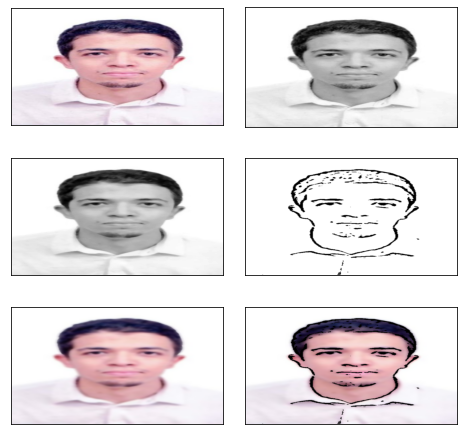

In [6]:
cartoonify(image)